# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [1]:
# Common imports
import numpy as np
import os

# To make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rcParams['figure.figsize'] = [10, 5]

In [2]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
WEEK_ID = "W05"

imgpath = os.path.join(PROJECT_ROOT_DIR, "images", WEEK_ID)
if not os.path.exists(imgpath):
    os.makedirs(imgpath)

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", WEEK_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [3]:
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# 5.1 Linear regression using the normal equation
First we'll generate some random data. _[slide 10]_

In [4]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [5]:
print(X.shape, y.shape)

(100, 1) (100, 1)


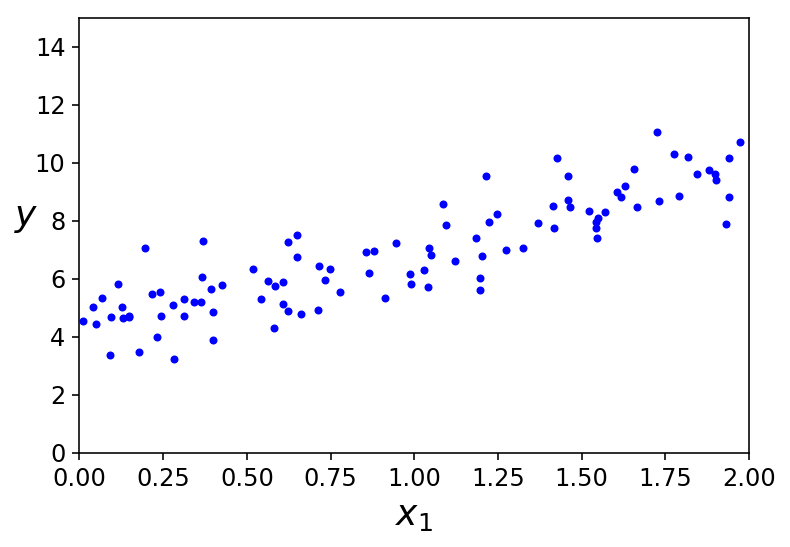

In [6]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15]);

Next let's solve a linear model with two parameters to fit the data with a linear equation. _[slide 11]_

In [7]:
# Add a column of ones to represent the intercept for each data point
X_b = np.c_[np.ones((100, 1)), X]

# Invert the X matrix to solve the parameters directly
# The @ operator is dot product in python 3.5+
theta_best = np.linalg.inv(X_b.T @ X_b) @ (X_b.T @ y)

In [8]:
X_b[:5]

array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788],
       [1.        , 1.19731697],
       [1.        , 0.31203728]])

In [9]:
theta_best

array([[4.21509616],
       [2.77011339]])

In order to invert a matrix that matrix must be square. Thus X is multiplied by it's transpose. This technique is called [OLS](https://en.wikipedia.org/wiki/Ordinary_least_squares) and is equivalent to minimizing the sum of squares error.

In [10]:
print(X_b.shape)
print((X_b.T @ X_b).shape)

(100, 2)
(2, 2)


In [11]:
# If the X data matrix is square the theta values can be solved directly since there is only one solution
np.linalg.inv(X_b[:2]) @ y[:2]

array([[4.33800046],
       [2.66498463]])

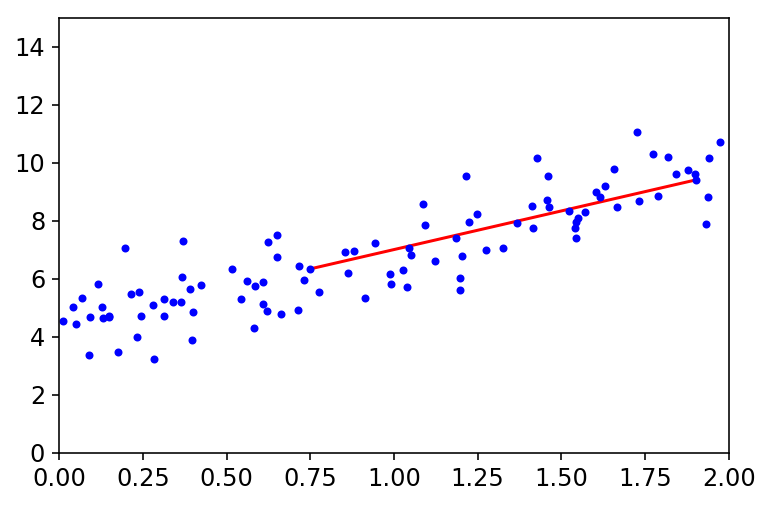

In [12]:
plt.plot(X[:2], y[:2], "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15]);

Let's plot the full Linear Model on the given dataset, by finding y values for 0 and 2 at the extremes. We can apply our learned theta parameters to do so.

In [13]:
# Points at x=0 and x=2
X_line = np.array([[0], [2]])
X_line_b = np.c_[np.ones((2, 1)), X_line]  # add x0 = 1 to each instance

# Calculate y for these two points
y_line = X_line_b @ theta_best
y_line

array([[4.21509616],
       [9.75532293]])

[0, 2, 0, 15]

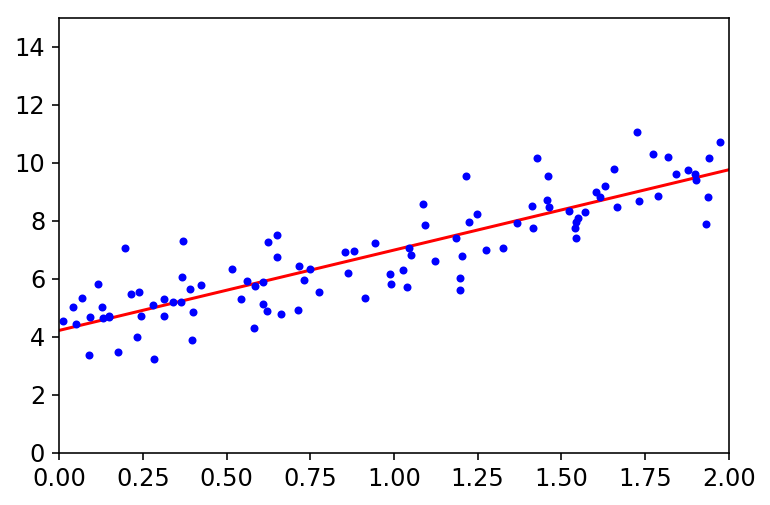

In [14]:
plt.plot(X_line, y_line, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])

Compare to the built in `LinearRegression` model in sklearn. _[slide 13]_


In [15]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

np.c_[lin_reg.intercept_, lin_reg.coef_]

array([[4.21509616, 2.77011339]])

In [16]:
# Previous learned OLS parameters
theta_best

array([[4.21509616],
       [2.77011339]])

The `LinearRegression` class is based on the pseudoinverse, a generalized alternative to ordinary least squares that relies on a mathematical technique called the [Moore-Penrose inverse](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse) which avoids some limitations of OLS such as when 𝑚<𝑛 (less samples than features) and the matrix can not be inverted.

In [17]:
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])

# 5.2 Linear regression using batch gradient descent
Use gradient descent to find the best values of theta. _[slide 22]_

In [18]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    y_hat = X_b @ theta
    gradients = 2/m * X_b.T @ (y_hat - y)
    theta = theta - eta * gradients

In [19]:
theta

array([[4.21509616],
       [2.77011339]])

In [20]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    # Plot data
    plt.plot(X, y, "b.")
    
    # Solve with BGD
    m = len(X_b)
    n_iterations = 100
    for iteration in range(n_iterations):
        
        # Plot fit line
        y_line = X_line_b.dot(theta)
        alpha=0.2
        style = "b--"
        if iteration == n_iterations - 1:
            style, alpha = "g", 1
        elif iteration == 0:
            style, alpha = "r", 1
        plt.plot(X_line, y_line, style, alpha=alpha)
        
        # Update parameters
        y_hat = X_b @ theta
        gradients = 2/m * X_b.T @ (y_hat - y)
        theta = theta - eta * gradients
        
        if theta_path is not None:
            theta_path.append(theta)
            
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16);

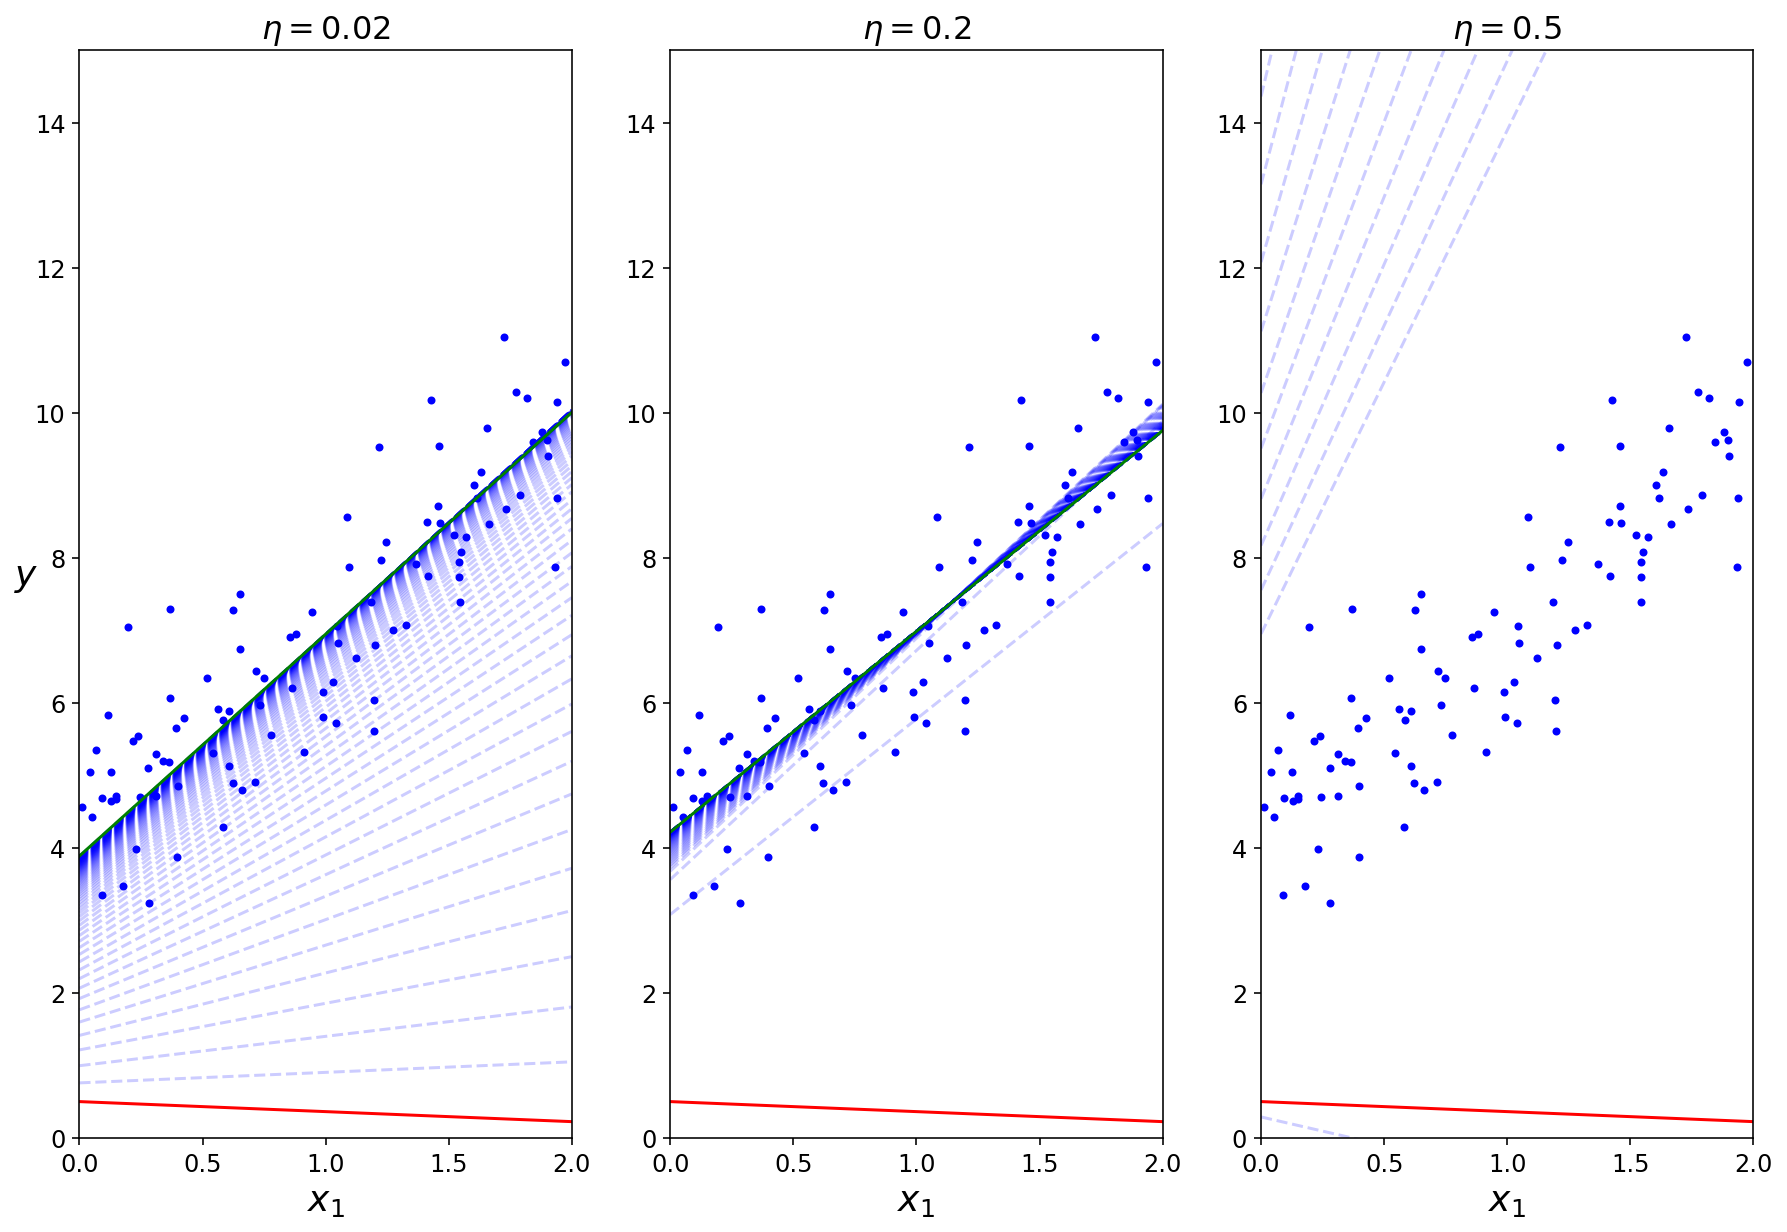

In [21]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(15, 10))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.2, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

Let's improve this by switching from batch to stochastic gradient descent. _[slide 27]_

Initial eta = 0.02
Final eta = 0.004347826086956522


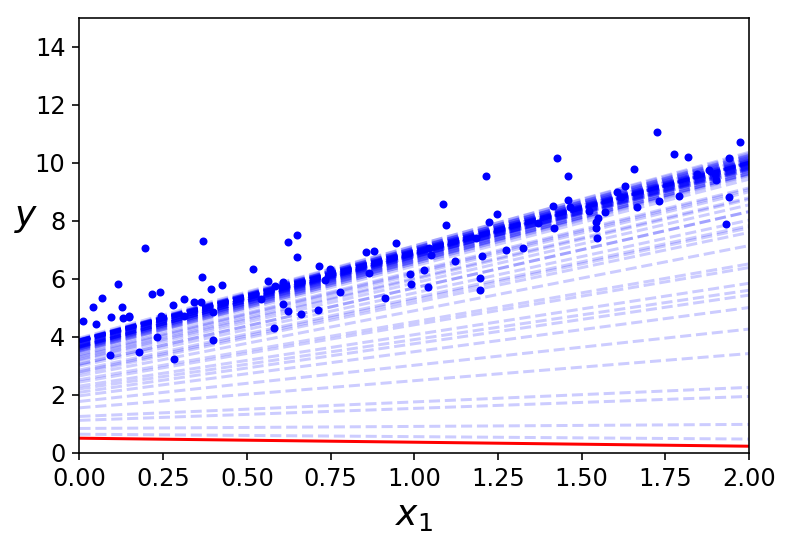

In [22]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

n_epochs = 10   # an epoch is one loop over the full dataset
t0, t1 = 5, 250  # learning schedule hyperparameters

# Simulated annealing
def learning_schedule(iteration):
    eta = t0 / (iteration + t1)
    return eta

theta = np.random.randn(2, 1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0:
            # Plot fit line for first epoch
            y_line = X_line_b.dot(theta)
            style, alpha = "b--", 0.2
            if i == 0:
                style, alpha = "r", 1
            plt.plot(X_line, y_line, style, alpha=alpha)
        
        # Select an index at random (stochastic)
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        # Calculate the gradient and update the parameters
        gradients = 2 * xi.T @ ((xi @ theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)
        
        # Print the eta value at the start and end
        if epoch == 0 and i == 0:
            print('Initial eta =', eta)
        if epoch == n_epochs - 1 and i == 0:
            print('Final eta =', eta)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15]);

In [23]:
theta

array([[4.15644116],
       [2.82935054]])

In [24]:
# Previous learned OLS parameters
theta_best

array([[4.21509616],
       [2.77011339]])

Now let's try to do the same with the built in sklearn model `SGDRegressor`. _[slide 29]_

In [25]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

np.c_[sgd_reg.intercept_, sgd_reg.coef_]

array([[4.16782089, 2.72603052]])

In [26]:
# SOLUTION
from sklearn.metrics import mean_squared_error

def mse_loss(model, X, y):
    model.fit(X, y.ravel())
    y_hat = model.predict(X)
    return mean_squared_error(y, y_hat)

In [27]:
# SOLUTION
print('Baseline error =', mse_loss(sgd_reg, X, y))

Baseline error = 0.8151384650657417


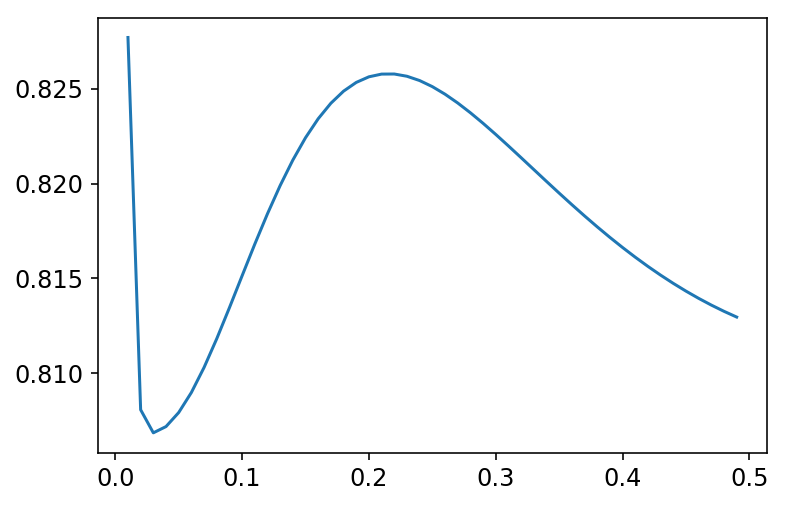

In [28]:
# SOLUTION
# With default adaptive learning rate
losses = []
etas = np.arange(0.01, 0.5, 0.01)
for eta in etas:
    model = SGDRegressor(max_iter=50, tol=-np.infty, penalty=None, eta0=eta, random_state=42)
    losses.append(mse_loss(model, X, y))

plt.plot(etas, losses);

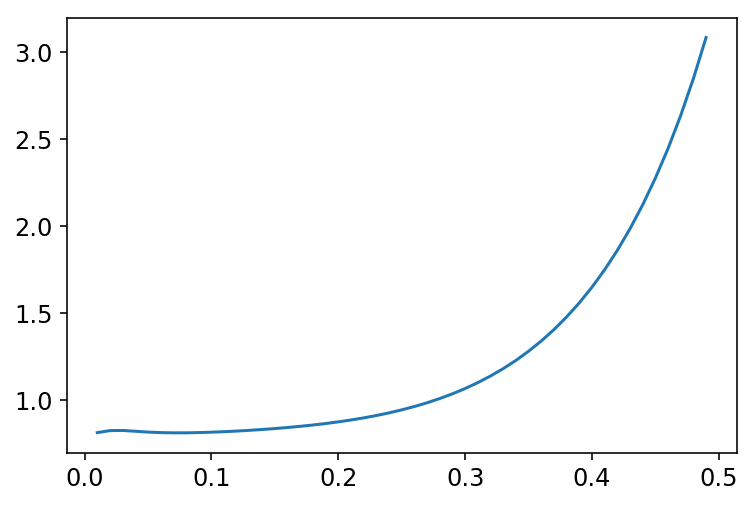

In [29]:
# SOLUTION
# With constant learning rate
losses = []
etas = np.arange(0.01, 0.5, 0.01)
for eta in etas:
    model = SGDRegressor(max_iter=50, tol=-np.infty, penalty=None, eta0=eta, random_state=42, learning_rate='constant')
    losses.append(mse_loss(model, X, y))

plt.plot(etas, losses);

Let's make a final improvement by incoporating mini-batch gradient descent. _[slide 31]_

In [30]:
theta_path_mgd = []

n_epochs = 50
batch_size = 20

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(iteration):
    return t0 / (iteration + t1)

t = 0
for epoch in range(n_epochs):
    # Must shuffle to randomize order each epoch
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    
    # Loop over the mini batches
    for i in range(0, m, batch_size):
        t += 1
        xi = X_b_shuffled[i:i + batch_size]
        yi = y_shuffled[i:i + batch_size]
        gradients = 2/batch_size * xi.T @ ((xi @ theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [31]:
theta

array([[4.25214635],
       [2.7896408 ]])

In [32]:
# Previous learned OLS parameters
theta_best

array([[4.21509616],
       [2.77011339]])

In [33]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

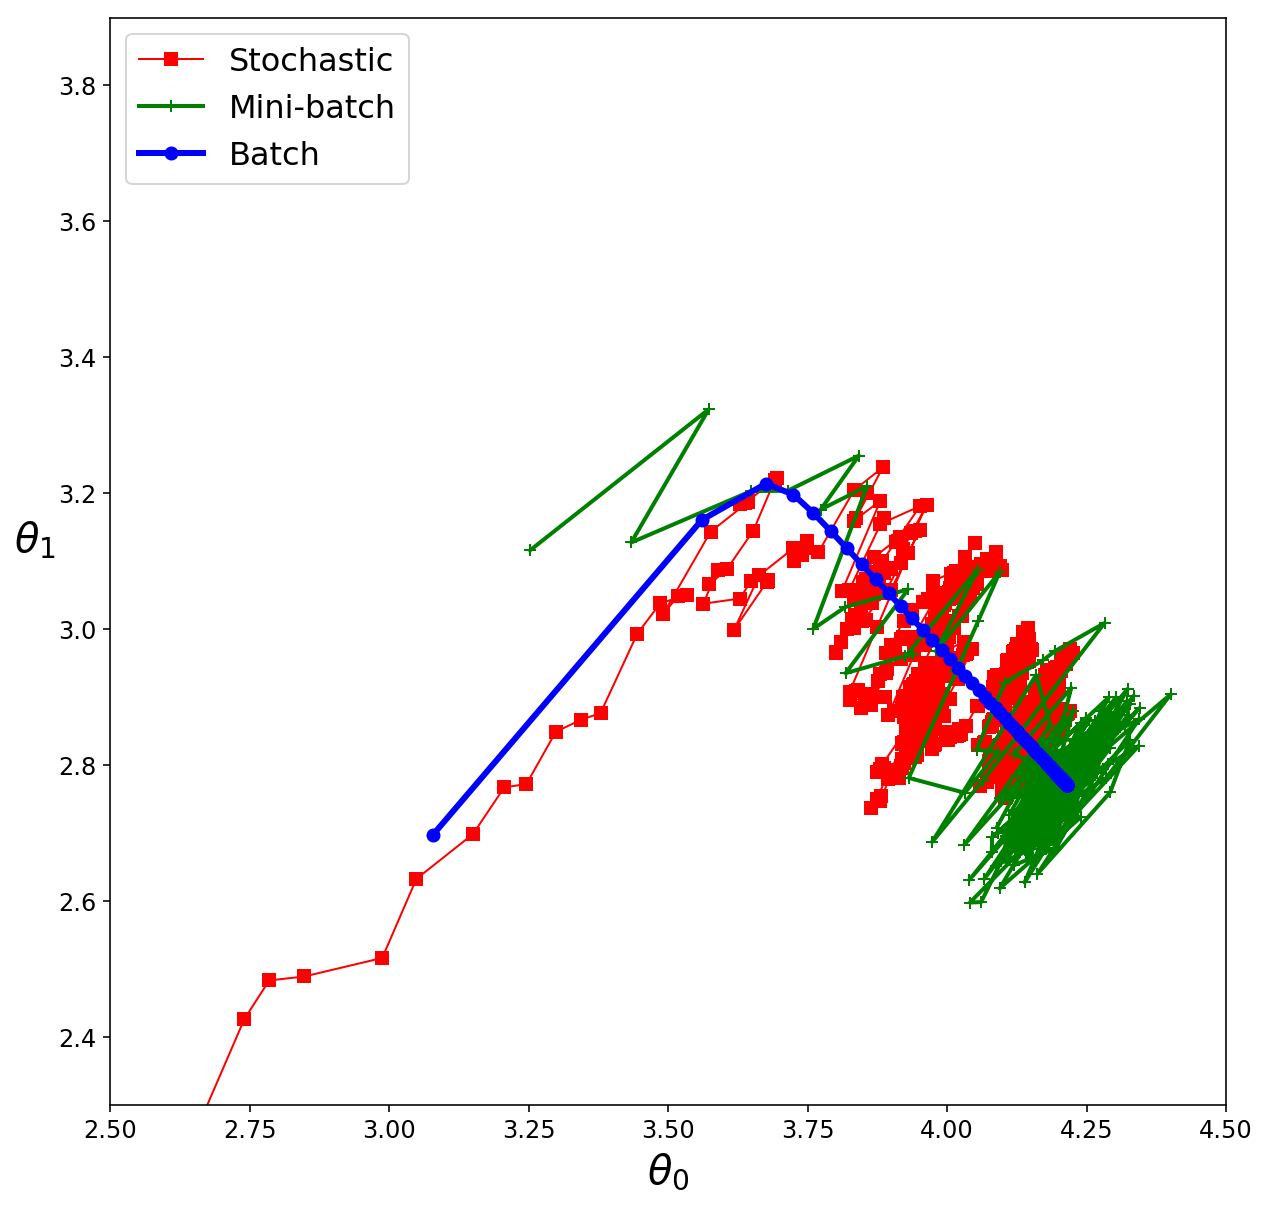

In [34]:
plt.figure(figsize=(10, 10))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9]);

# 5.3 Polynomial regression
Generate some random non-linear data. _[slide 35]_

In [35]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

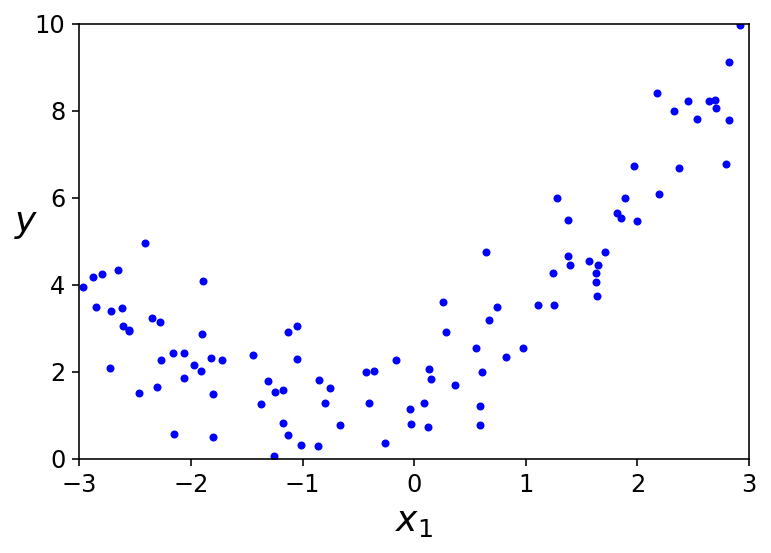

In [36]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [37]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [38]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [39]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

In [40]:
# SOLUTION
%time
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.11 µs


(array([1.78134581]), array([[0.93366893, 0.56456263]]))

In [41]:
# SOLUTION
mean_squared_error(y, lin_reg.predict(X_poly))

0.7771936663502368

In [42]:
# SOLUTION
# Remember that LinearRegression finds an exact solution
np.linalg.pinv(np.c_[np.ones(len(X_poly)), X_poly]) @ y

array([[1.78134581],
       [0.93366893],
       [0.56456263]])

In [43]:
# SOLUTION
# SGDRegressor finds an approximate solution faster
from sklearn.linear_model import SGDRegressor

%time
lin_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty=None, eta0=0.1, random_state=42)
lin_reg.fit(X_poly, y.ravel())
lin_reg.intercept_, lin_reg.coef_

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 12.2 µs


(array([1.78224606]), array([0.97622128, 0.54792598]))

In [44]:
# SOLUTION
mean_squared_error(y, lin_reg.predict(X_poly))

0.789157409502716

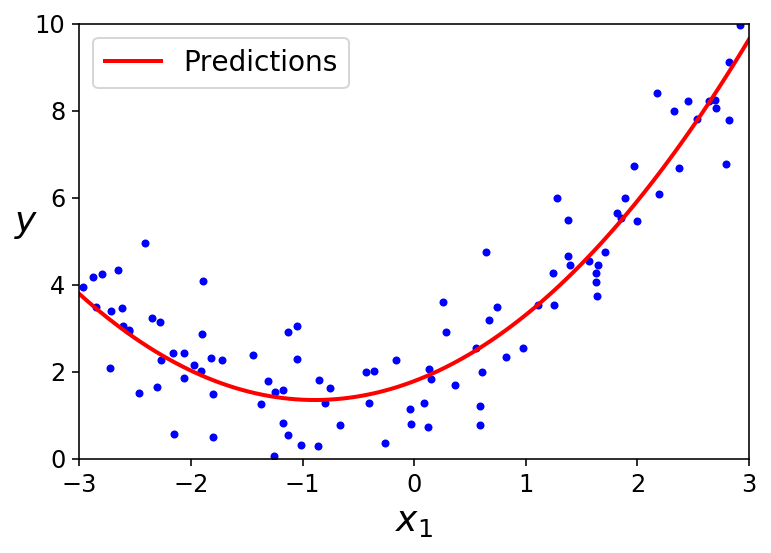

In [45]:
X_line = np.linspace(-3, 3, 100).reshape(100, 1)
X_line_poly = poly_features.transform(X_line)
y_line = lin_reg.predict(X_line_poly)
plt.plot(X, y, "b.")
plt.plot(X_line, y_line, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

# 5.4 Learning curves for combatting overfitting

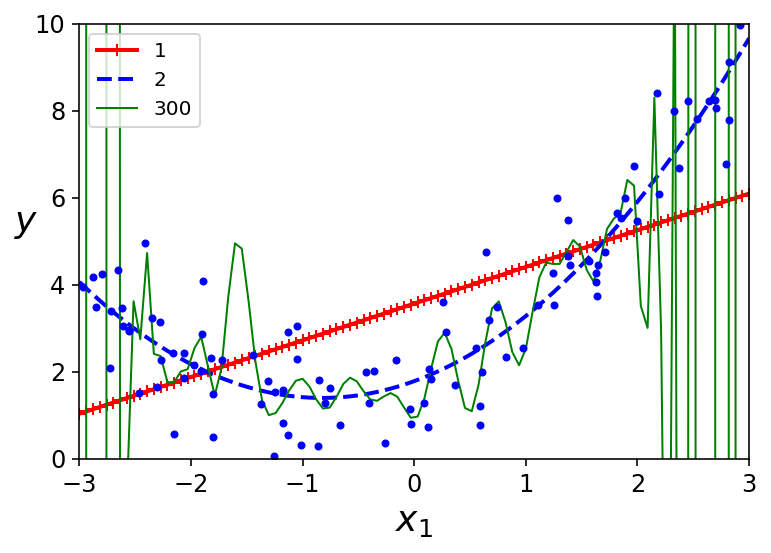

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Change degree of polynomial
line_settings = (("r-+", 2, 1), ("b--", 2, 2), ("g-", 1, 300))
for style, width, degree in line_settings:

    polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())])
    
    polynomial_regression.fit(X, y)
    y_line = polynomial_regression.predict(X_line)
    plt.plot(X_line, y_line, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [47]:
# The 300 degree polynomial parameters are huge
polynomial_regression.get_params()['lin_reg'].coef_[:, :6]

array([[ 6.14213218e-01,  1.34162044e+02,  1.15457957e+03,
        -1.45145530e+04, -1.17443089e+05,  6.43608273e+05]])

Let's look at how the learning curves change with the amount of data. _[slide 43]_

In [48]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    # Split data
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    
    # Track errors for all training data sizes
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_hat_train = model.predict(X_train[:m])
        y_hat_val = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_hat_train))
        val_errors.append(mean_squared_error(y_val, y_hat_val))

    # Plot training curves
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)

[0, 80, 0, 5]

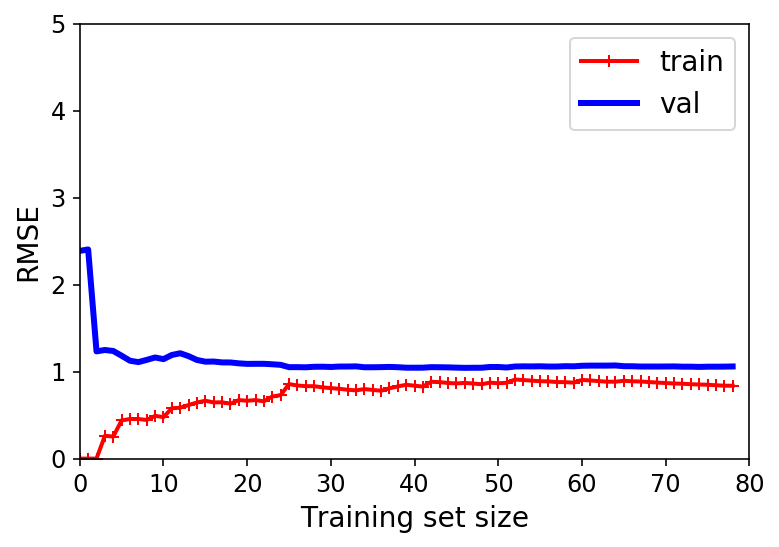

In [49]:
plot_learning_curves(LinearRegression(), X_poly, y.ravel())
plt.axis([0, 80, 0, 5])

How does it compare to a high degree polynomial model? _[slide 45]_

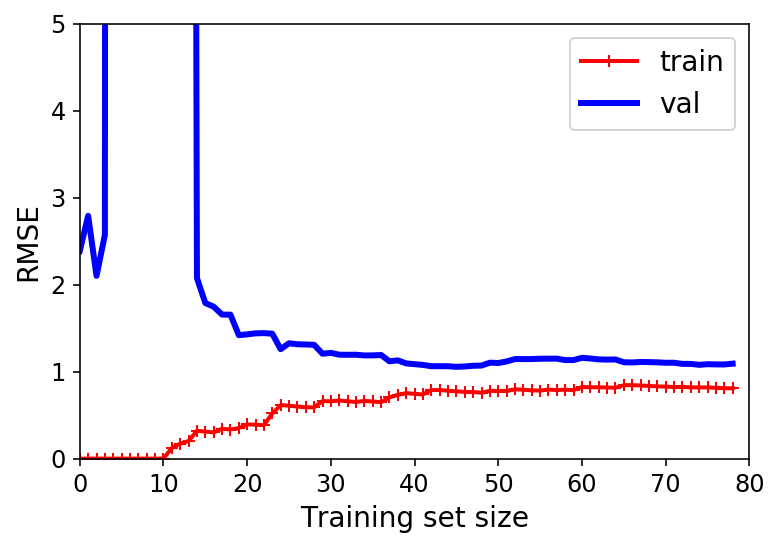

In [50]:
polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression())])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 5]);

Let's implement some early stopping to help automatically select the training epochs. _[slide 60]_

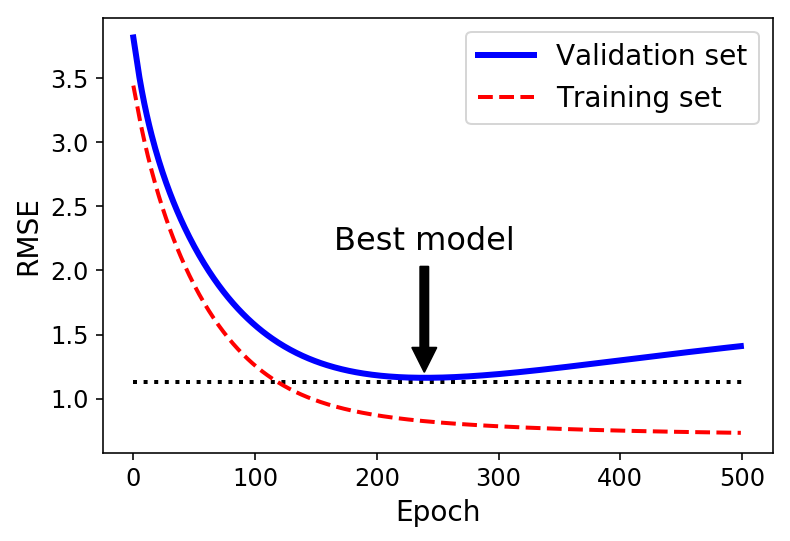

In [51]:
from sklearn.base import clone

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

# Split dataset, add polynomial features and standardize
X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

# Create model
sgd_reg = SGDRegressor(max_iter=1,
                       tol=-np.infty,
                       penalty=None,
                       eta0=0.0005,
                       warm_start=True,
                       learning_rate="constant",
                       random_state=42)

# Train model
n_epochs = 500
train_errors, val_errors = [], []
minimum_val_error = float("inf")
best_model = None
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_hat_train = sgd_reg.predict(X_train_poly_scaled)
    y_hat_val = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_hat_train))
    val_errors.append(mean_squared_error(y_val, y_hat_val))
    
    if val_errors[-1] < minimum_val_error:
        minimum_val_error = val_errors[-1]
        best_model = clone(sgd_reg)

# Plot learning curves
best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16)

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14);

In [52]:
print(best_epoch)
print(best_model)

239
SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='squared_loss', max_iter=1,
       n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, tol=-inf, validation_fraction=0.1,
       verbose=0, warm_start=True)


# 5.5 Regularized models
Let's compare the affect of different alpha values on overfitting. _[slide 53]_

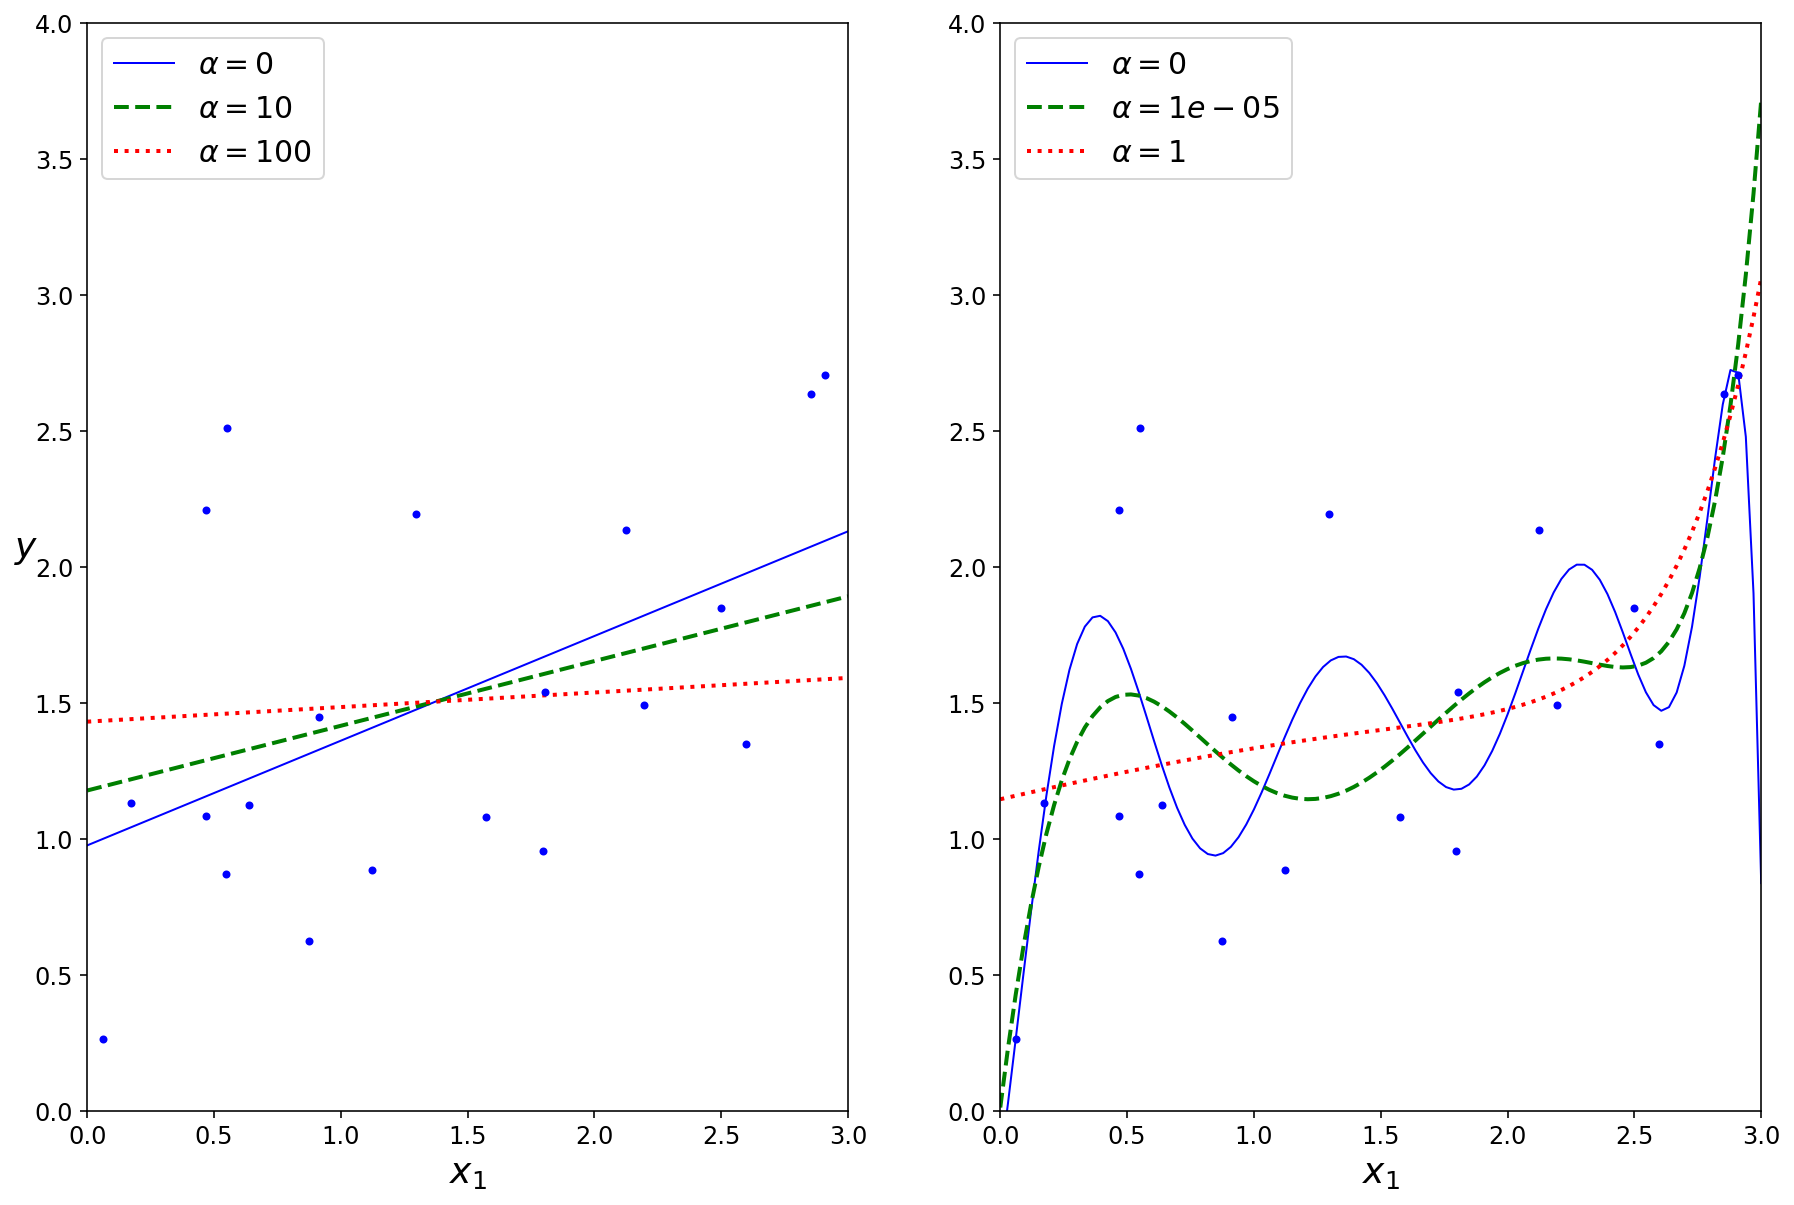

In [53]:
from sklearn.linear_model import Ridge

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_line = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_line_regul = model.predict(X_line)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_line, y_line_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(15, 10))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

The built in `SGDRegressor` with penalty 'l2' is slightly different than Ridge because it is iterative, not a direct solver.

In [54]:
%time
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs


array([[1.55071465]])

In [55]:
%time
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.96 µs


array([[1.5507201]])

In [56]:
%time
sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty="l2", random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.91 µs


array([1.49905184])

Let's compare to Lasso regression. _[slide 56]_

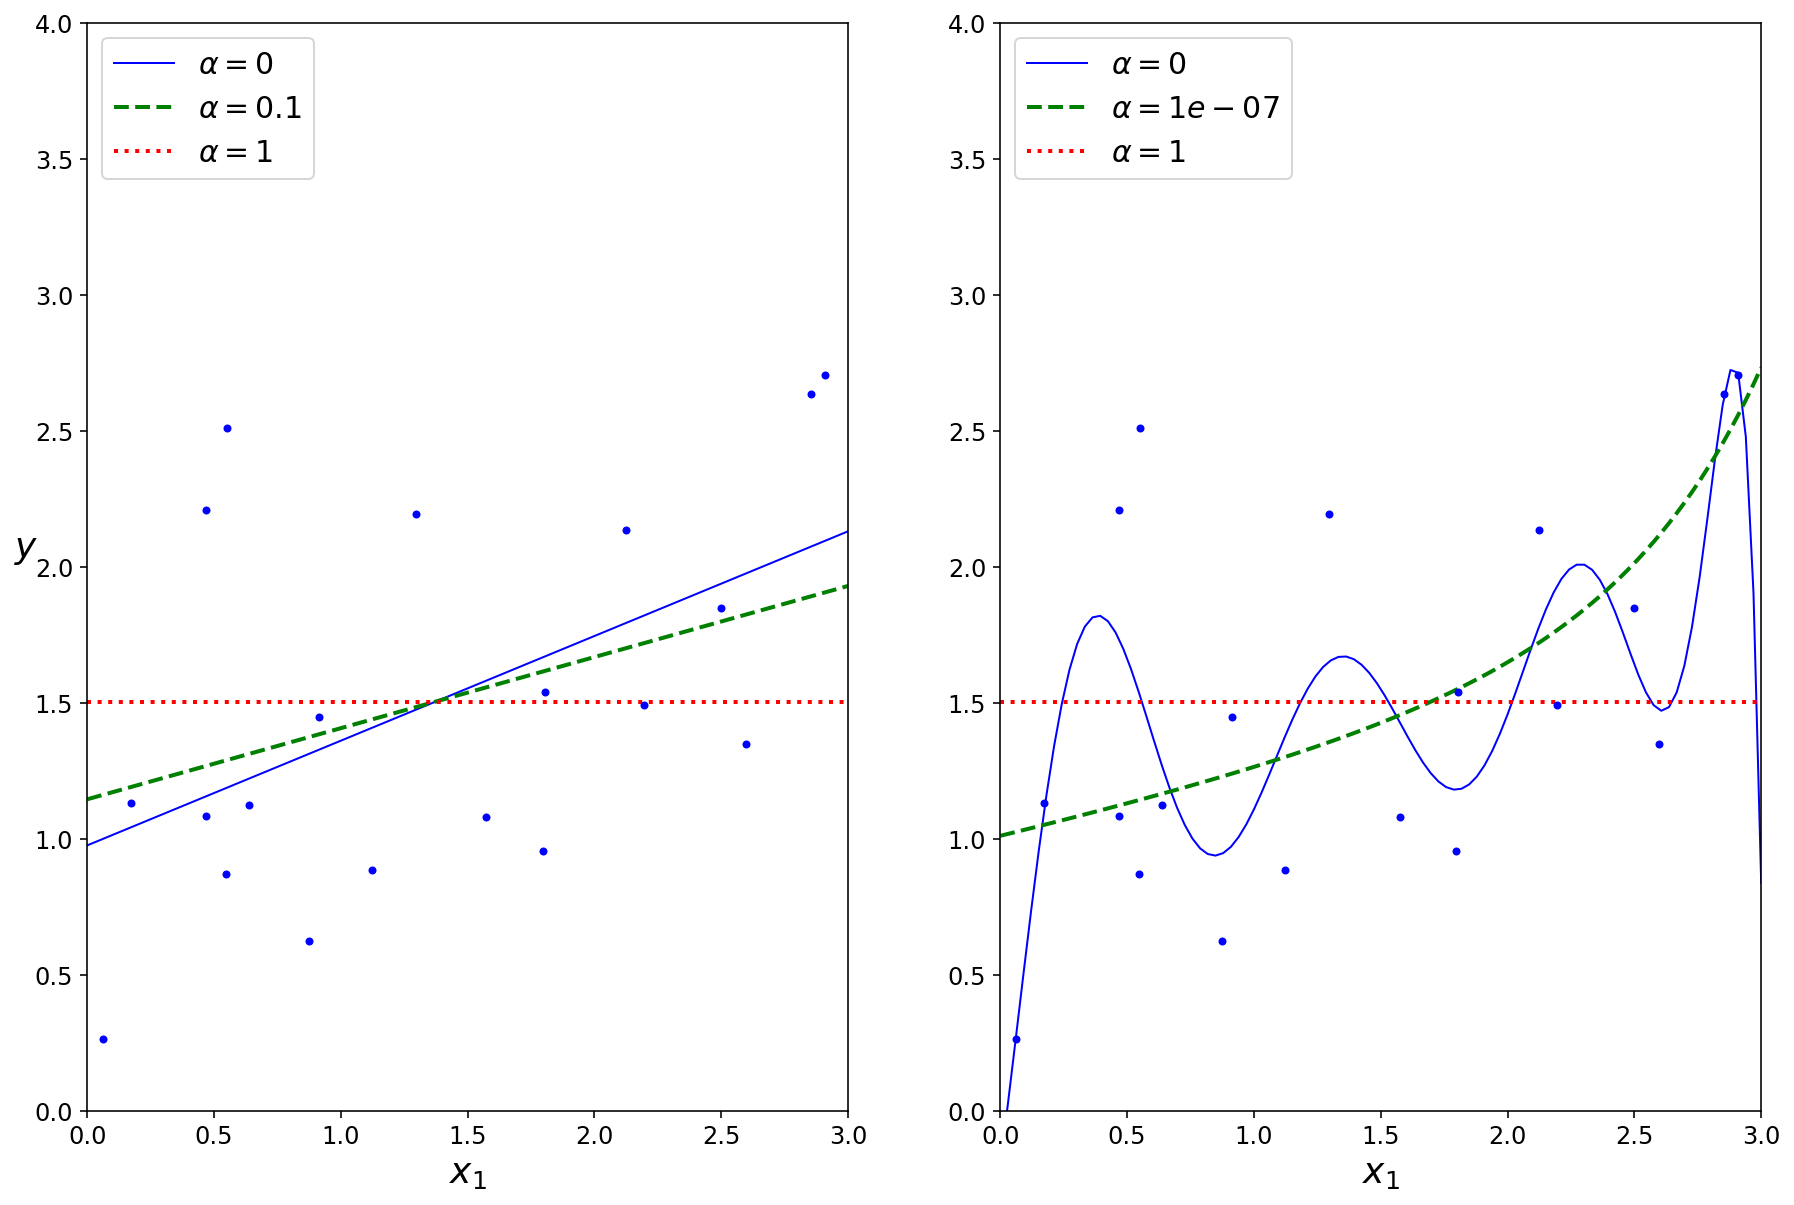

In [57]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(15, 10))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), tol=1, random_state=42)

In [58]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

In [59]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

# 5.6 Logistic regression
Now let's turn linear regression into logistic regression (a classifier!) with a simple addition, the sigmoid function. _[slide 64]_

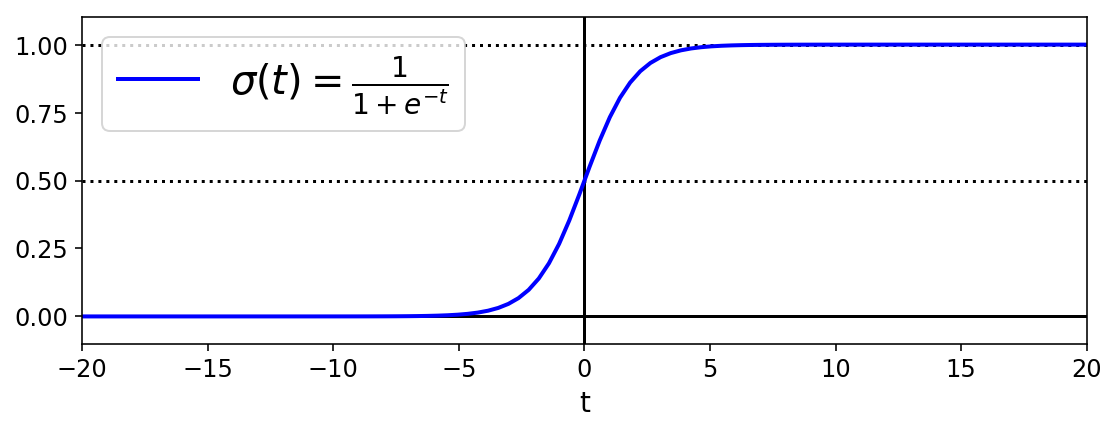

In [60]:
t = np.linspace(-20, 20, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-20, 20], [0, 0], "k-")
plt.plot([-20, 20], [0.5, 0.5], "k:")
plt.plot([-20, 20], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-20, 20, -0.1, 1.1]);

When applied to linear regression we get the `Logistic Regression` model. _[slide 69]_

In [61]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [62]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [63]:
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0

In [64]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver="liblinear", random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

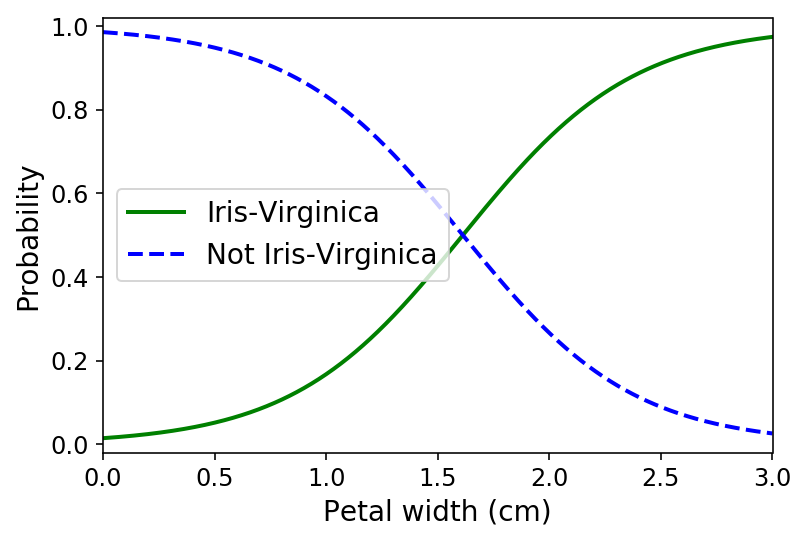

In [65]:
X_line = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_line)

plt.plot(X_line, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_line, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02]);

The decision boundary can be clearly seen. Any values near it will be close to equal probability of both options.

In [66]:
decision_boundary = X_line[y_proba[:, 1] >= 0.5][0]
decision_boundary

array([1.61561562])

In [67]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [68]:
log_reg.predict_proba([[1.7], [1.5]])

array([[0.44316529, 0.55683471],
       [0.57328164, 0.42671836]])

Let's extend our classifier to two dimensions. _[slide 71]_

In [69]:
LogisticRegression??

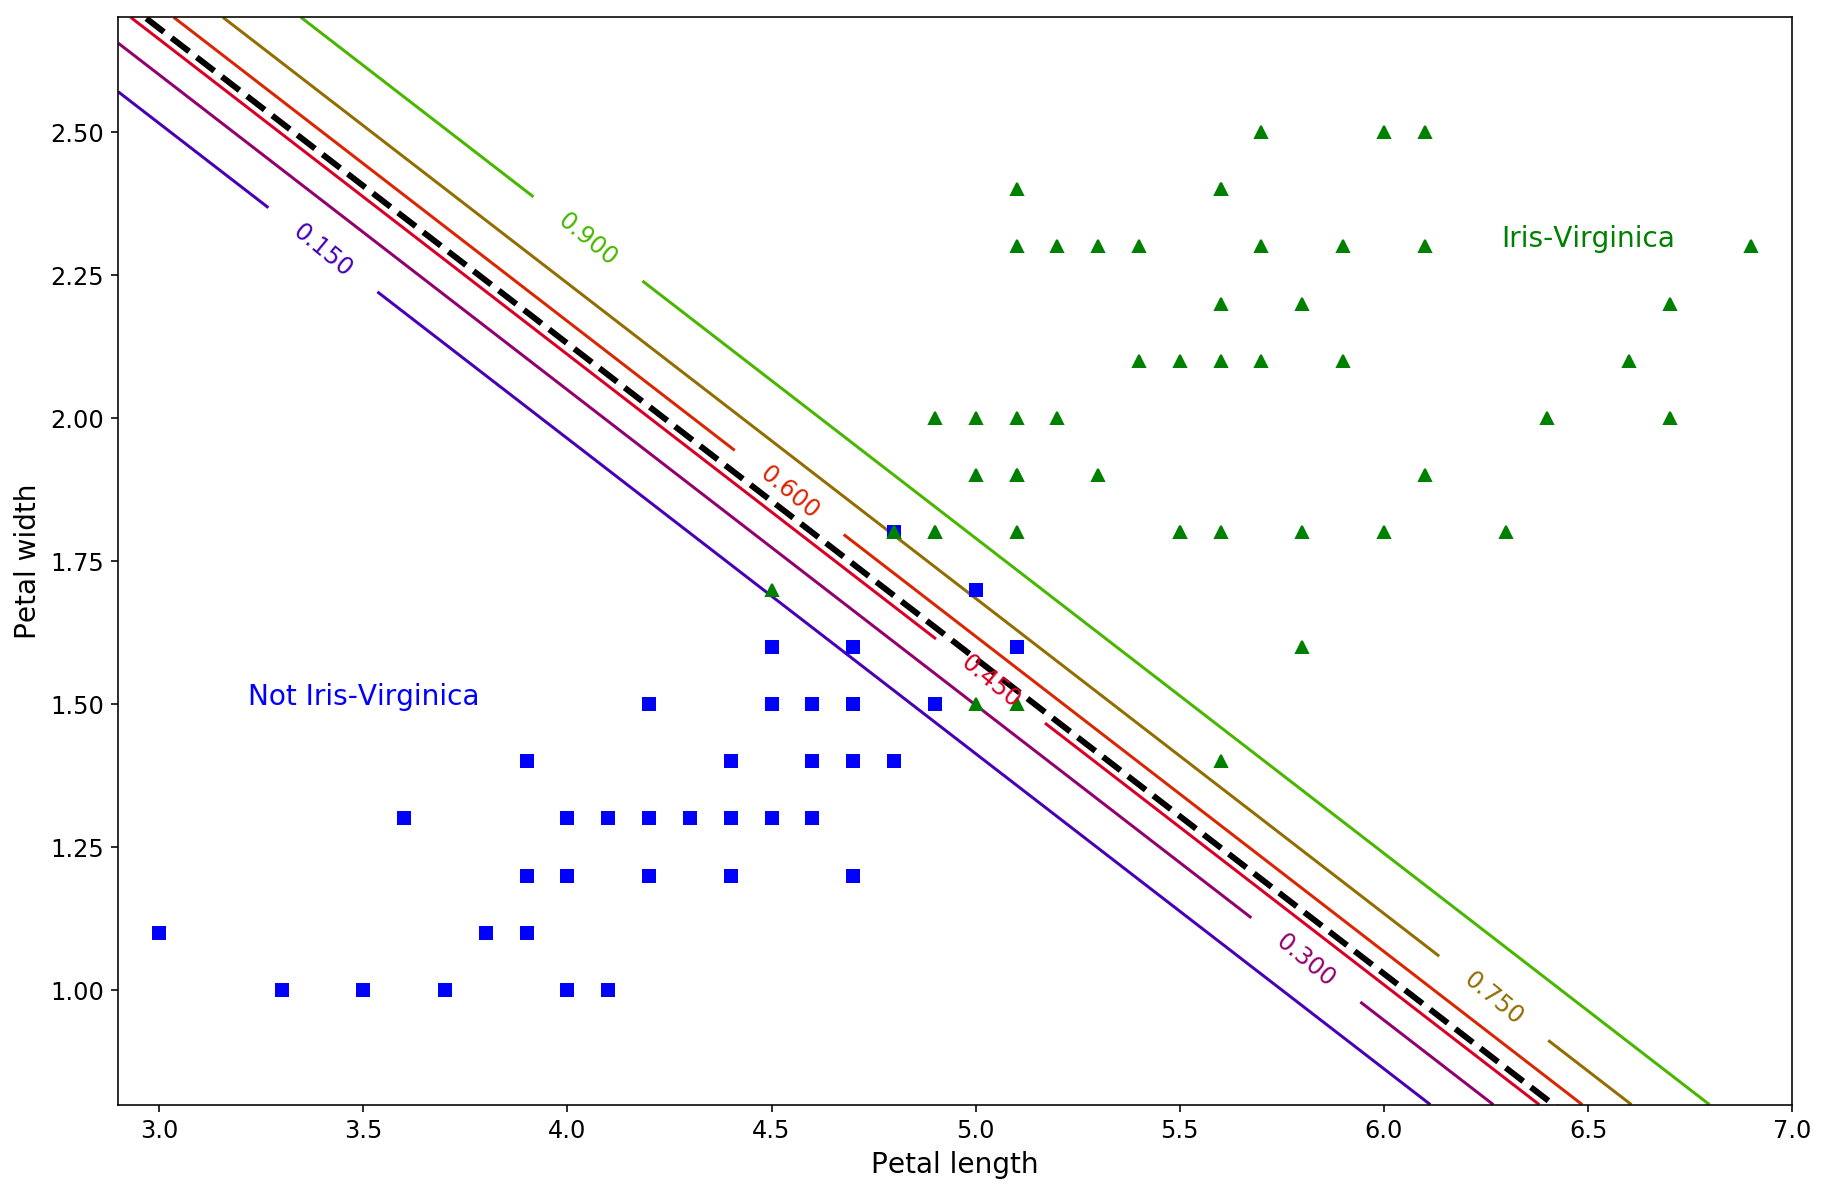

In [70]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0

# Create and fit model
log_reg = LogisticRegression(solver="liblinear", C=10**10, random_state=42)
log_reg.fit(X, y)

# Predict values in range
x0, x1 = np.meshgrid(np.linspace(2.9, 7, 500).reshape(-1, 1),
                     np.linspace(0.8, 2.7, 200).reshape(-1, 1))
X_line = np.c_[x0.ravel(), x1.ravel()]
y_proba = log_reg.predict_proba(X_line)

# Plot results
plt.figure(figsize=(15, 10))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)

left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7]);

Now let's use softmax to make the classifier multinomial. _[slide 73]_

In [71]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

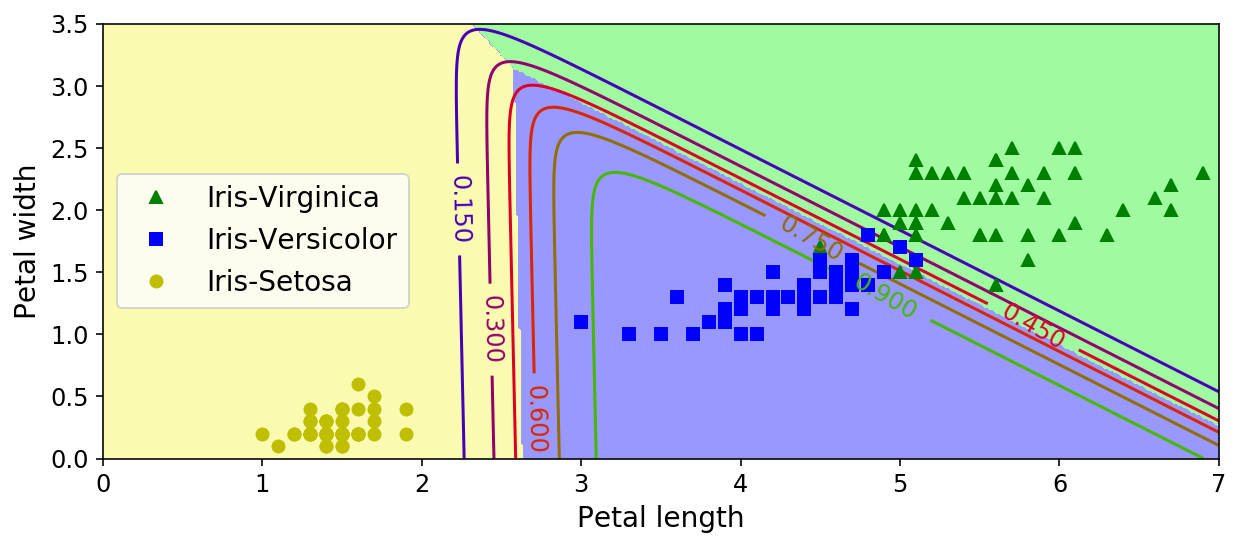

In [72]:
from matplotlib.colors import ListedColormap

# Predict class label for data points in range
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1))
X_line = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_line)
y_predict = softmax_reg.predict(X_line)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

# Plot the results
plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5]);

In [73]:
softmax_reg.predict([[5, 2]])

array([2])

In [74]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

In [75]:
np.sum(softmax_reg.predict_proba([[5, 2]]))

1.0


### Batch Gradient Descent with early stopping for Softmax Regression without using Scikit-Learn

Let's start by loading the data. We will just reuse the Iris dataset we loaded earlier.

In [76]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

We need to add the bias term for every instance ($x_0 = 1$):

In [77]:
X_with_bias = np.c_[np.ones([len(X), 1]), X]

And let's set the random seed so the output of this exercise solution is reproducible:

In [78]:
np.random.seed(2042)

The easiest option to split the dataset into a training set, a validation set and a test set would be to use Scikit-Learn's `train_test_split()` function, but the point of this exercise is to try understand the algorithms by implementing them manually. So here is one possible implementation:

In [79]:
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]
X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

The targets are currently class indices (0, 1 or 2), but we need target class probabilities to train the Softmax Regression model. Each instance will have target class probabilities equal to 0.0 for all classes except for the target class which will have a probability of 1.0 (in other words, the vector of class probabilities for ay given instance is a one-hot vector). Let's write a small function to convert the vector of class indices into a matrix containing a one-hot vector for each instance:

In [80]:
def to_one_hot(y):
    n_classes = y.max() + 1
    m = len(y)
    Y_one_hot = np.zeros((m, n_classes))
    Y_one_hot[np.arange(m), y] = 1
    return Y_one_hot

Let's test this function on the first 10 instances:

In [81]:
y_train[:10]

array([0, 1, 2, 1, 1, 0, 1, 1, 1, 0])

In [82]:
to_one_hot(y_train[:10])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

Looks good, so let's create the target class probabilities matrix for the training set and the test set:

In [83]:
Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_one_hot = to_one_hot(y_test)

Now let's implement the Softmax function. Recall that it is defined by the following equation:

$\sigma\left(\mathbf{s}(\mathbf{x})\right)_k = \dfrac{\exp\left(s_k(\mathbf{x})\right)}{\sum\limits_{j=1}^{K}{\exp\left(s_j(\mathbf{x})\right)}}$

In [84]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums

We are almost ready to start training. Let's define the number of inputs and outputs:

In [85]:
n_inputs = X_train.shape[1] # == 3 (2 features plus the bias term)
n_outputs = len(np.unique(y_train))   # == 3 (3 iris classes)

Now here comes the hardest part: training! Theoretically, it's simple: it's just a matter of translating the math equations into Python code. But in practice, it can be quite tricky: in particular, it's easy to mix up the order of the terms, or the indices. You can even end up with code that looks like it's working but is actually not computing exactly the right thing. When unsure, you should write down the shape of each term in the equation and make sure the corresponding terms in your code match closely. It can also help to evaluate each term independently and print them out. The good news it that you won't have to do this everyday, since all this is well implemented by Scikit-Learn, but it will help you understand what's going on under the hood.

So the equations we will need are the cost function:

$J(\mathbf{\Theta}) =
- \dfrac{1}{m}\sum\limits_{i=1}^{m}\sum\limits_{k=1}^{K}{y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)}$

And the equation for the gradients:

$\nabla_{\mathbf{\theta}^{(k)}} \, J(\mathbf{\Theta}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{ \left ( \hat{p}^{(i)}_k - y_k^{(i)} \right ) \mathbf{x}^{(i)}}$

Note that $\log\left(\hat{p}_k^{(i)}\right)$ may not be computable if $\hat{p}_k^{(i)} = 0$. So we will add a tiny value $\epsilon$ to $\log\left(\hat{p}_k^{(i)}\right)$ to avoid getting `nan` values.

In [86]:
eta = 0.01
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    error = Y_proba - Y_train_one_hot
    if iteration % 500 == 0:
        print(iteration, loss)
    gradients = 1/m * X_train.T.dot(error)
    Theta = Theta - eta * gradients

0 5.446205811872683
500 0.8350062641405651
1000 0.6878801447192402
1500 0.6012379137693313
2000 0.5444496861981872
2500 0.5038530181431526
3000 0.4729228972192248
3500 0.44824244188957774
4000 0.4278651093928792
4500 0.41060071429187134
5000 0.3956780375390374


And that's it! The Softmax model is trained. Let's look at the model parameters:

In [87]:
Theta

array([[ 3.32094157, -0.6501102 , -2.99979416],
       [-1.1718465 ,  0.11706172,  0.10507543],
       [-0.70224261, -0.09527802,  1.4786383 ]])

Let's make predictions for the validation set and check the accuracy score:

In [88]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.9666666666666667

Well, this model looks pretty good. For the sake of the exercise, let's add a bit of $\ell_2$ regularization. The following training code is similar to the one above, but the loss now has an additional $\ell_2$ penalty, and the gradients have the proper additional term (note that we don't regularize the first element of `Theta` since this corresponds to the bias term). Also, let's try increasing the learning rate `eta`.

In [89]:
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    error = Y_proba - Y_train_one_hot
    if iteration % 500 == 0:
        print(iteration, loss)
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

0 6.629842469083912
500 0.5339667976629506
1000 0.5036400750148942
1500 0.49468910594603216
2000 0.4912968418075477
2500 0.48989924700933296
3000 0.4892990598451198
3500 0.489035124439786
4000 0.4889173621830818
4500 0.4888643337449303
5000 0.48884031207388184


Because of the additional $\ell_2$ penalty, the loss seems greater than earlier, but perhaps this model will perform better? Let's find out:

In [90]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

Cool, perfect accuracy! We probably just got lucky with this validation set, but still, it's pleasant.

Now let's add early stopping. For this we just need to measure the loss on the validation set at every iteration and stop when the error starts growing.

In [91]:
eta = 0.1 
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter
best_loss = np.infty

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

    logits = X_valid.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_valid_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    if iteration % 500 == 0:
        print(iteration, loss)
    if loss < best_loss:
        best_loss = loss
    else:
        print(iteration - 1, best_loss)
        print(iteration, loss, "early stopping!")
        break

0 4.7096017363419875
500 0.5739711987633518
1000 0.5435638529109128
1500 0.5355752782580262
2000 0.5331959249285545
2500 0.5325946767399383
2765 0.53254609667919
2766 0.5325460971327977 early stopping!


In [92]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

Still perfect, but faster.

Now let's plot the model's predictions on the whole dataset:

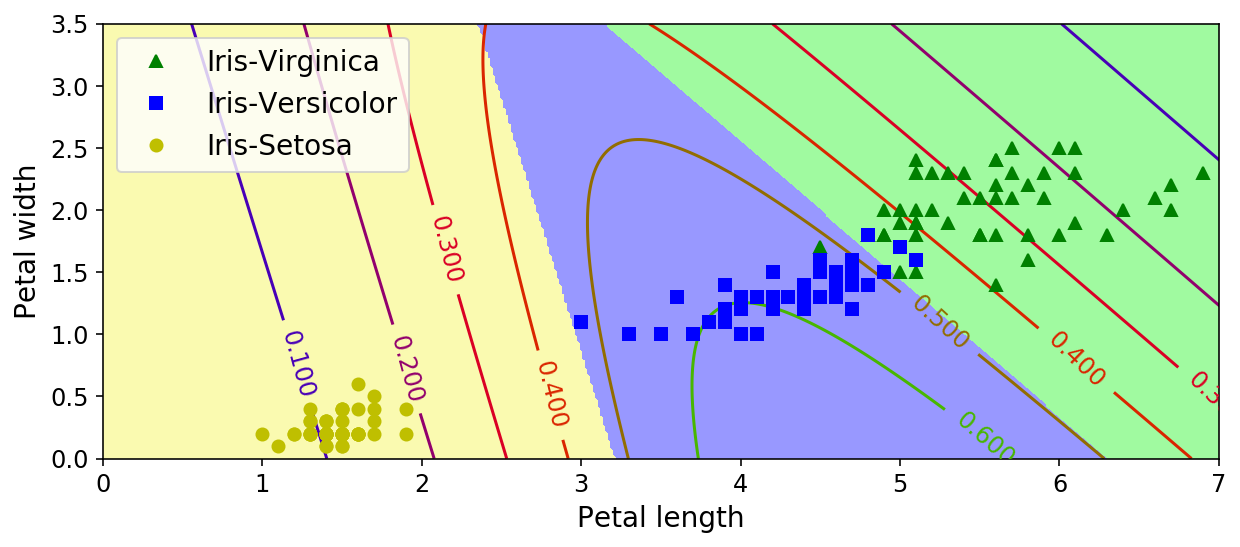

In [93]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

logits = X_new_with_bias.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

And now let's measure the final model's accuracy on the test set:

In [94]:
logits = X_test.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_test)
accuracy_score

0.9333333333333333

Our perfect model turns out to have slight imperfections. This variability is likely due to the very small size of the dataset: depending on how you sample the training set, validation set and the test set, you can get quite different results. Try changing the random seed and running the code again a few times, you will see that the results will vary.